In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = r"C:\Users\Utkarsh\Desktop\ML-workspace\ComputerVision\obj detection files\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [3]:
frozen_model = r"C:\Users\Utkarsh\Desktop\ML-workspace\ComputerVision\obj detection files\frozen_inference_graph.pb"

In [5]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [6]:
class_Labels = []
file_name = r"C:\Users\Utkarsh\Desktop\ML-workspace\ComputerVision\obj detection files\labels.txt"
with open(file_name, 'rt') as f:
    class_labels = f.read().rstrip('\n').split('\n')

In [7]:
class_labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [9]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000000002A121930>

In [14]:
img = cv2.imread('boy.jpg')

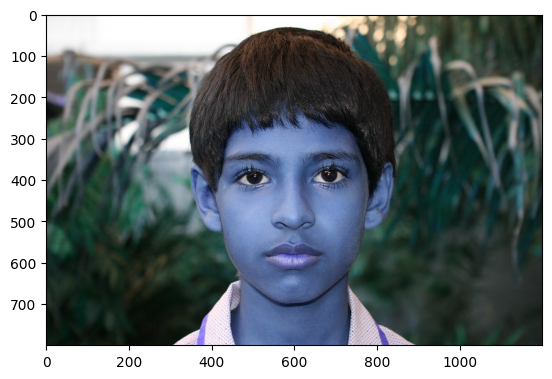

In [16]:
plt.imshow(img)

In [17]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [18]:
print(ClassIndex)

[1]


In [21]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, class_labels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255, 0), thickness = 3)

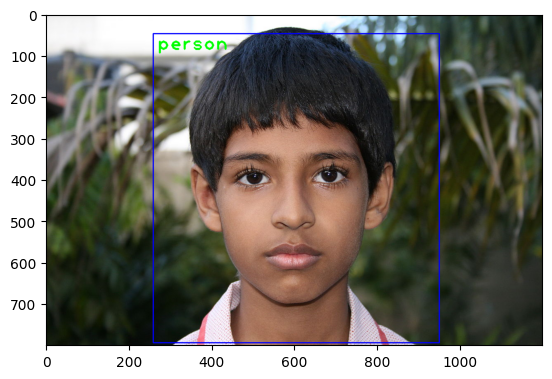

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

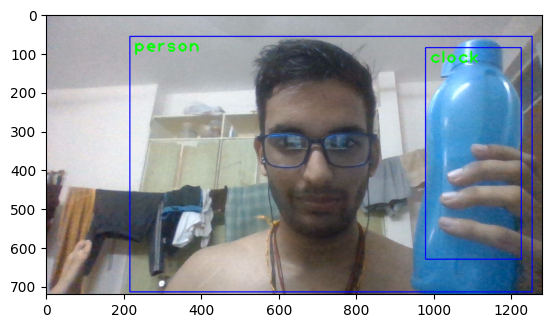

In [27]:

img = cv2.imread('Mee.jpg')
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, class_labels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255, 0), thickness = 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

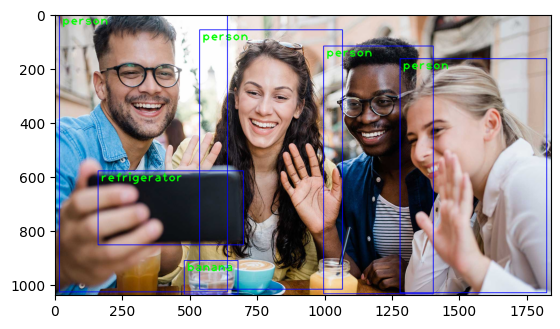

In [29]:
img = cv2.imread('Group.jpg')
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, class_labels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255, 0), thickness = 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [34]:
import cv2

# Load the video file or webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video')

# Get the original width and height of the video frames
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set the window size to match the video frame size
cv2.namedWindow('Object Detection', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Object Detection', width, height)

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Assuming `model` and `class_labels` are already defined
# model = ...  (your object detection model)
# class_labels = [...]  (your list of class labels)

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if no frame is captured

    # Perform object detection on the frame
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    # Check if any objects are detected
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:  # Assuming your model has 80 classes
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, class_labels[ClassInd - 1], 
                            (boxes[0] + 10, boxes[1] + 40), font, 
                            fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # Display the frame with detected objects
    cv2.imshow('Object Detection', frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()
